<a href="https://colab.research.google.com/github/AlvimDePaula/Maos_a_obra_Aprendizado_de_Maquina/blob/main/capitulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 4 - Treinando Modelos

Um notebook de estudo do capítulo 4 do livro "Mãos a Obra: Aprendizado de Máquina com Scikit-Learn e TensorFlow". Onde esse notebook tem como objetivo replicar os códigos expostos no capítulo da minha maneira, estudos das teorias apresentadas e resolução dos exercícios.

In [ ]:
import pandas as pd
import numpy as np

### Regressão Linear

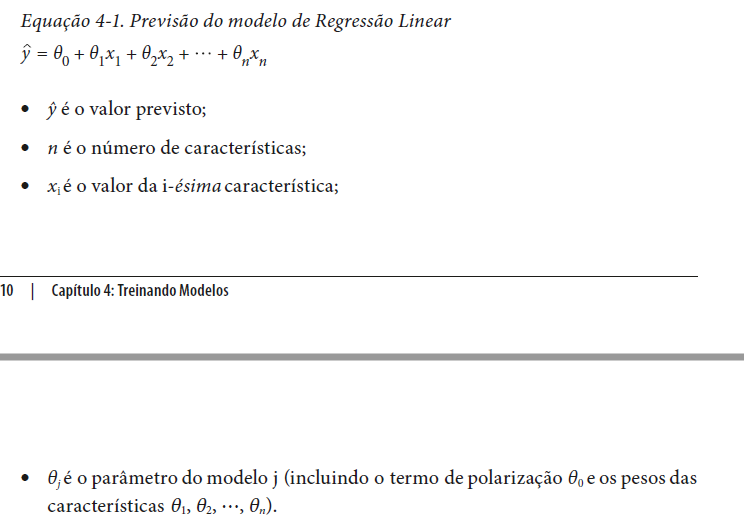

- Para treinar um modelo de regressão linear, deve-se encontrar o valor de _0_ (teta) que minimize a função de custo

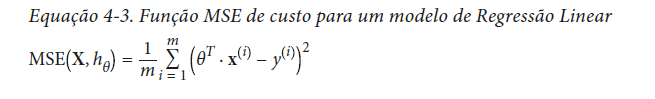

###### Método dos Minímos Quadrados

- Solução de forma fechada, uma equação matemática que dá o resultado diretamente. Sem a necessidade de iterações.

- Método lento quando se tem um valor de característica muito alto (mais de 100mil). Mas em compensação lida eficientemente com grandes conjuntos de treinamento, desde que caiba na memória.

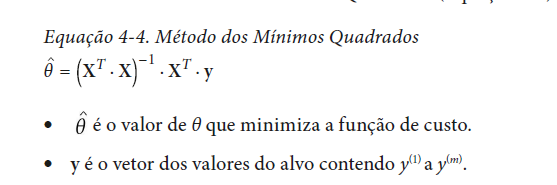

###### Gradiente Descendente

- Algoritmo de otimização.
- A ideia é ajustar iterativamente os parametros para minimizar função de custo
- Começa com valores aleatórios (_inicialização aleatória_), então melhorando gradualmente, dando um pequeno passo (tamanho desse passo é chamado de taxa de aprendizado) de cada vez tentando dimunuir a função de custo, até que o algoritmo convirja para um minimo.

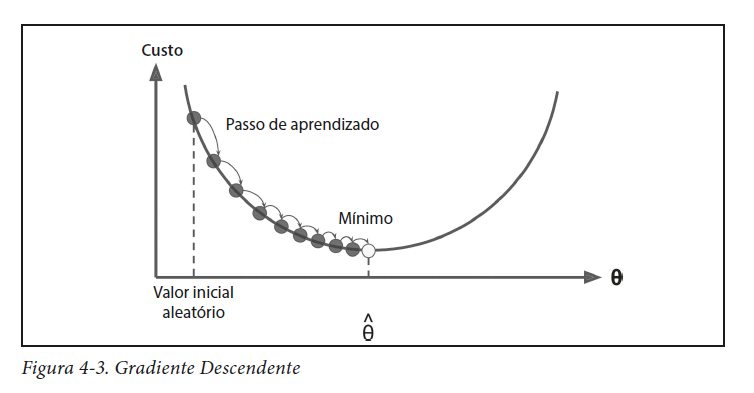

- Nem todas funções de custo se parecem com tigelas regulares (figura acima). Podem haver desníveis, o que pode levar a função a convergir para mínimo local, o que é não tão bom quanto ao mínimo global.

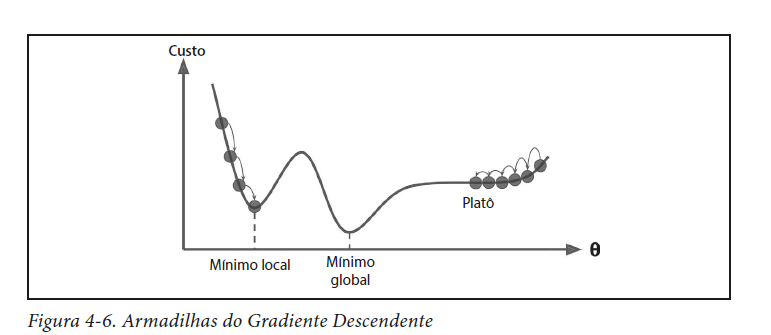

- A função de custo MSE (mean squared error) é uma função convexa, o que significa que existe apenas o mínimo global.
- Aplicar um escalonamento vai fazer a função convergir mais rápido.

###### Gradiente Descendente em Lotes

- Utiliza todo conjunto de treinamento para calcular os gradientes em cada passo.
- A cada iteração se calcula o gradiente da função de custo em relação a cada parâmetro do modelo, através da derivada parcial.
- Lento para grandes conjuntos de dados, mas se dimensiona bem para grande números de características.
- O vetor gradiente achado depois da derivada parcial é multiplicado por uma constante para determinar o tamanho do passo (_taxa de aprendizado_)
- Utilizando diferente valores para _taxa de aprendizado_:

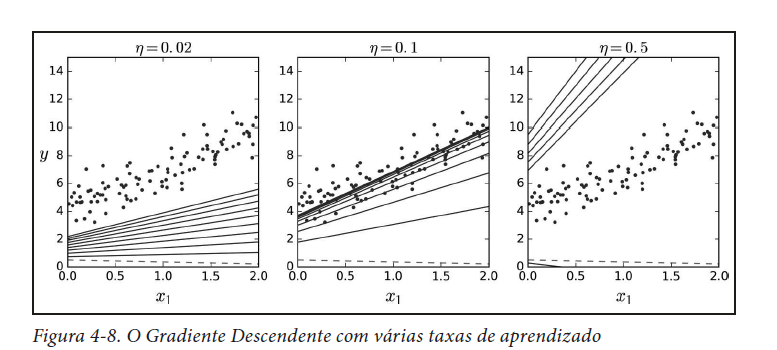

- Figura da esquerda apresenta _taxa de aprendizado_ baixo, vai alcançar o objetivo mas precisará de mais iterações e vai demorar mais tempo.

- Figura do meio apresenta um bom valor de _taxa de aprendizado_ onde converge para solução.

- Figura da direita apresenta alto valor de _taxa de aprendizado_, divergindo e ficando mais longe da solução

- Boa maneira de encontrar o valor de taxa de aprendizado é utilizando o método de Grid Search.

###### Gradiente Descendente Estocástico

- Utiliza uma instância aleatória do conjunto de treinamento em cada etapa.
- Algoritmo fica mais rápido.
- Permite treinar grandes conjuntos de treinamento.
- É bem menos regular do que o gradiente descendente em lote.
- A função de custo vai ter alta variação ao longo do processo, assim fazendo o algoritmo ter valores bons para seus parâmetros mas não ótimos.

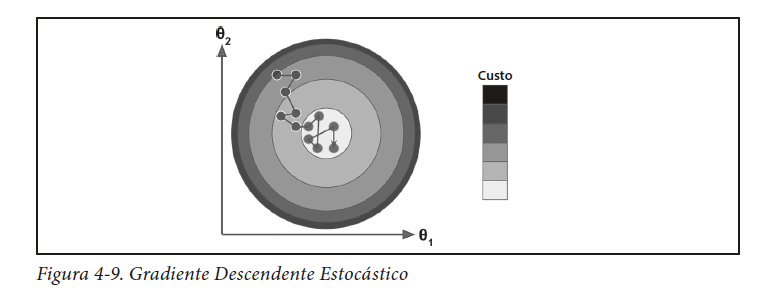

- Por ter função de custo irregular terá uma chance maior de encontrar o minímo global e não estagnar no minímo locais.

- *Recozimento Simulado*: Redução da taxa de aprendizado ao longo das iterações para que o algoritmo se estabeleça no mínimo local.

- *Cronograma de Aprendizado*: Função de determina a taxa de aprendizado em cada iteração.

- A cada rodada de iterações é chamado de _época_

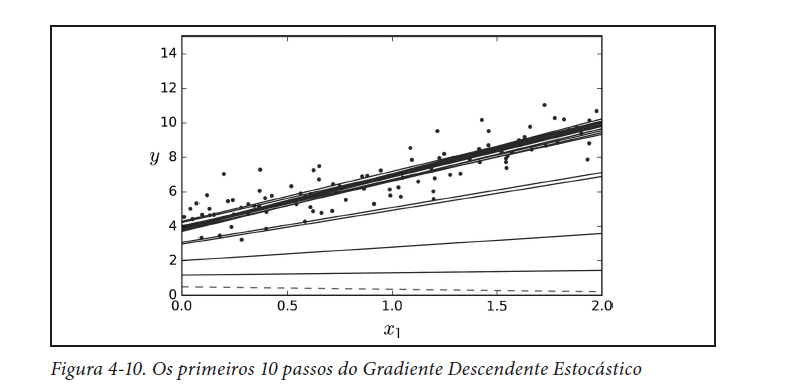

###### Gradiente Descendente em Minilotes

- Faz o cálculo dos gradientes em pequenos conjuntos aleatórios de instâncias chamado _minilotes_.

- Ganho de desempenho na otimização de hardware das operações de matrizes comparado ao gradiente descendente estocástico.

- Fica um pouco mais perto do minímo do que SGD mas é mais dificil "escapar" do minímo local.

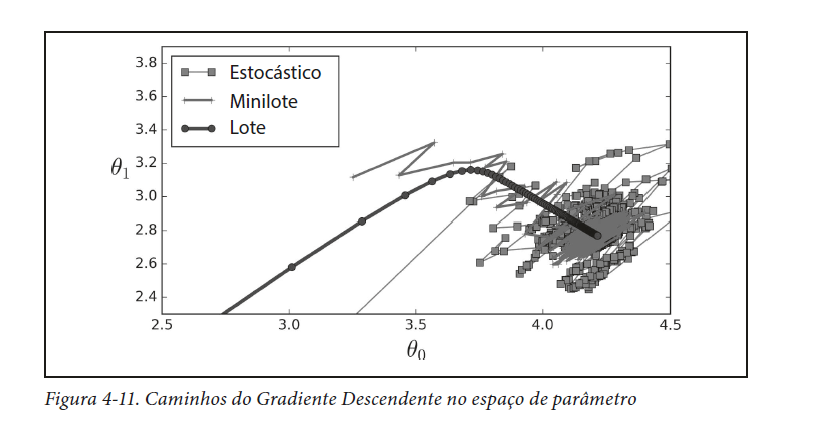

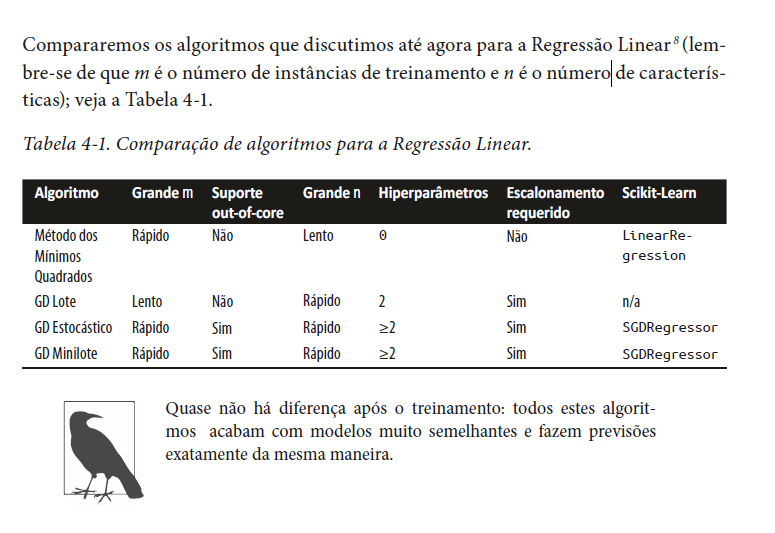

### Regressão Polinomial

- Acrescentar potências de cada características e treinar um modelo linear neste novo conjunto estendido. Está técnica é chamada de Regressão Polinomial.


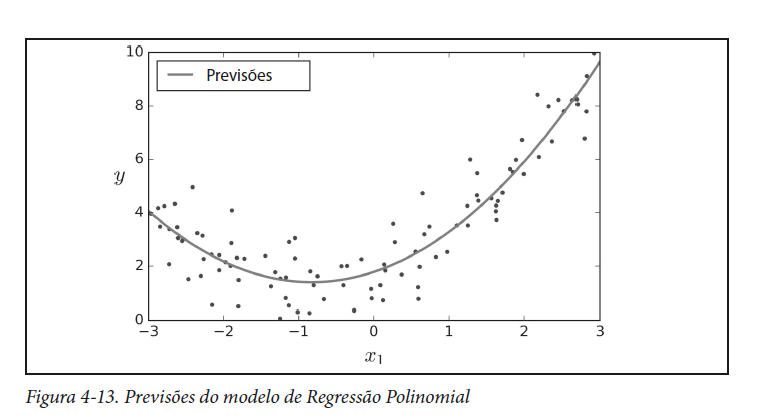

- Ao executar a regressão polinomial de alto grau, PROVAVELMENTE você acomodará os dados de treinamento muito melhor do que com a regressão linear simples.

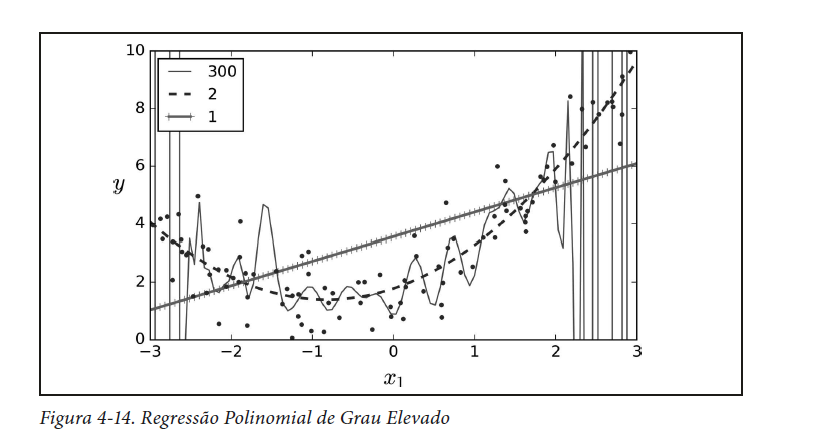


- A função com grau elevado (linha contínua) está sobreajustando excessivamente aos dados de treinamento. (overfitting)

- A função com grau 1 (linha de trem) está subajustado. (underfitting)

- A função com grau 2 (linha pontilhada), neste caso, é o modelo que melhor generaliza.

- _curva de aprendizado_: Plotagem do desempenho do modelo no conjunto de treinamento e no conjunto de validação como uma função do tamanho do conjunto de treinamento.
- Para gerar plotagens, basta treinar o modelo várias vezes em subconjunto de tamanho diferentes no conjunto de treinamento.

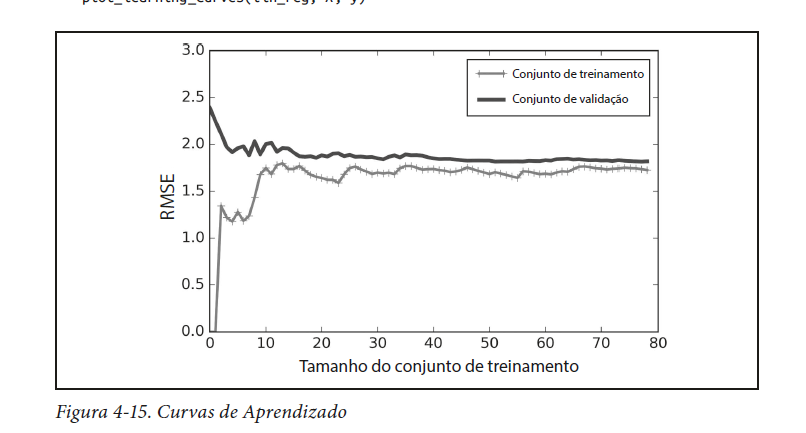


- Conjunto de treinamento com pouca instâncias:
 - Se ajusta perfeitamente no conjunto de treinamento, ou seja, é incapaz de gerar adequadamente e é por isso que o erro de validação é inicialmente grande.

- Conjunto de treinamento com mais instâncias:
 - Torna-se impossível que o modelo se ajuste perfeitamente, seja porque são dados ruidosos ou porque não são dados lineares. Assim, esse erro subirá até convergir. Com o modelo generalizando melhor, o erro diminui no dados de treino e diminui com aumento de instâncias.

- *OBS*: No gráfico acima as curvas convergiram muito perto de uma da outra, isso se dá porque linha reta não consegue fazer um bom trabalho em modelagem de dados.

- *OBS2*: Curvas característica de um modelo subajustado. Ambas curvas convergiram, estão próximas e bastantes altas.

- Curva de aprendizado de um modelo de grau 10º.


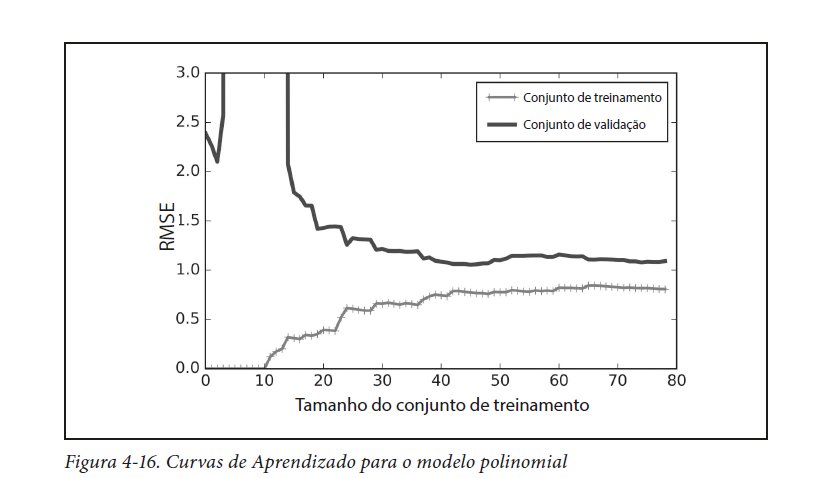


- O erro nos dados de treinamento é muito inferior ao encontrado  no modelo de regressão linear.
- Com poucas instâncias no modelo, se tem um desempenho significativamente melhor nos dados de treinamento e pessimo desempenho nos dados de treinamento (overfitting). Mas com o aumento de instâncias as curvas continuam se aproximando.

*Informação*: Uma maneira melhorar modelos com sobreajustes é alimentá-lo com mais dados de treinamento até que o erro de validação atinja o erro de treinamento.

- Viés: Erro de generalização. Modelo com alta flexibilidade tem um baixo viés. Um modelo com viés alto provavelmente se subajustará ao dados.
- Variância: Sensibilidade do modelo a pequenas variações. Um modelo com muito grau de liberdade provavelmente terá uma alta variação, portanto, se sobreajustará.
Erro Irredutível: Deve-se ao ruidos dos dados em si. Única maneira de reduzir essa parte do erro é limpar os dados.

### Modelos Lineares Regularizados

Servem para reduzir a quantidade de variável em modelos de regessão.

###### Regressão de Ridge

- É uma versão regularizada da regressão linear.
- É adicionado um termo de regularização à função de custo. Metade do quadrado da normal
- 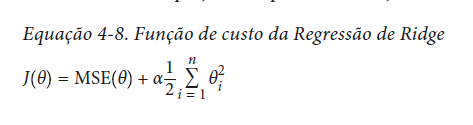

- Termo de regularização só deve ser adicionado à função de custo durante o treinamento.
- Avaliar o modelo utilizando medida de desempenho não regularizado.
- É comum as funções de custo de treinamento e de teste sejam diferentes. Função de custo para treinamentos deve ser derivadas que aceitem bem a otimização, enquanto a medida de desempenho utilizada para teste deve ser o mais próximas possível do objetivo final.
- O hiperparâmetro alfa image.png controla regularização do modelo. alfa = 0 é um regressão linear simples. alfa muito grande faz com que os pesos cheguem próximos zero, resultando uma linha plana que passa pela média dos dados.
- É importante dimensionar os dados.

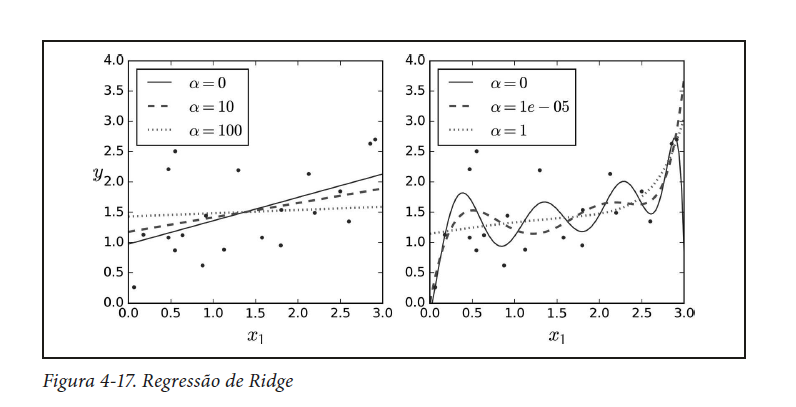

- Dados lineares utilizando diferentes valores de alfa. A esquerda é um modelo simples de Ridge. Direita é um polinômio de grau 10 e escalonado.
- Observe que com o aumento do alfa leva a previsões mais planas. Isso reduz a variância do modelo, mas aumenta seu viés.
- Regressão de Ridge tem equação fechada (fórmula) e aberta (gradiente descendente).
- Regressão Ridge é conhecida também como "l2"

#### Regressão Lasso

- É outra versão de regularizada da Regressão Linear.
- Regressão ridge também é conhecida como "l1".
- Adiciona um termo de regularização á função de custo também, porém, utiliza a normal apenas.
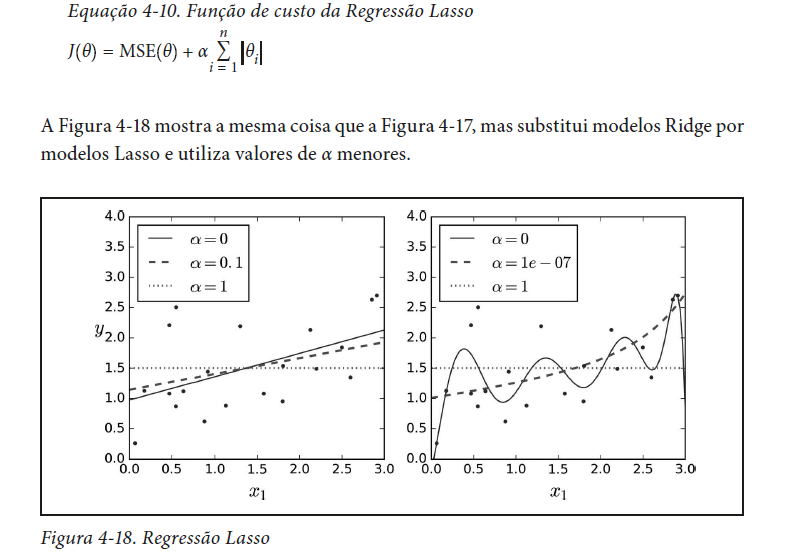

- Tende a eliminar pesos da características menos importante.


#### Elastic Net

- Meio termo entre Regressão Ridge e Regressão Lasso.
- r = 0 -> Regressão Ridge
- r = 1 -> Regressão Lasso

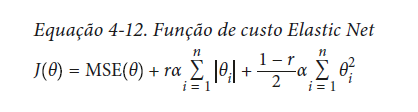

#### Qual utilizar?

- Ridge é um bom padrão, mas se suspeitar que tem características inúteis nos dados, então melhor usar Lasson ou Elastic Net.

#### Parada Antecipada

- Interrompe o treinamento assim que o erro de validação atingir um mínimo.

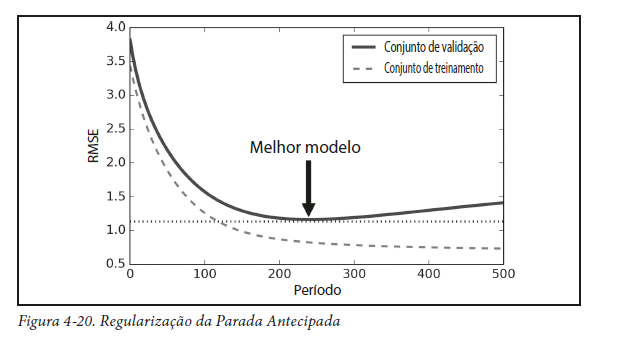


- No gráfico mostra um modelo complexo, Regressão Polinomial de alto grau, sendo treinado por gradiente descendente em lote.
- Com iterações acontecendo é notável a queda da função de perda (RMSE) até um certo ponto, depois há uma subida nos valores da função de perda, indicando que o modelo começou a se sobreajustar aos dados de treinamentos.
- Com a _parada antecipada_ você para o treinamento quando o erro de validação atingir o mínimo.   

### Regressão Logística

- É comumente utilizada para estimar a probabilidade de uma instância pertencer a uma determinada classe.
- Classificador Binário.
- É uma função sigmóide, que mostra um número entre 0 e 1.

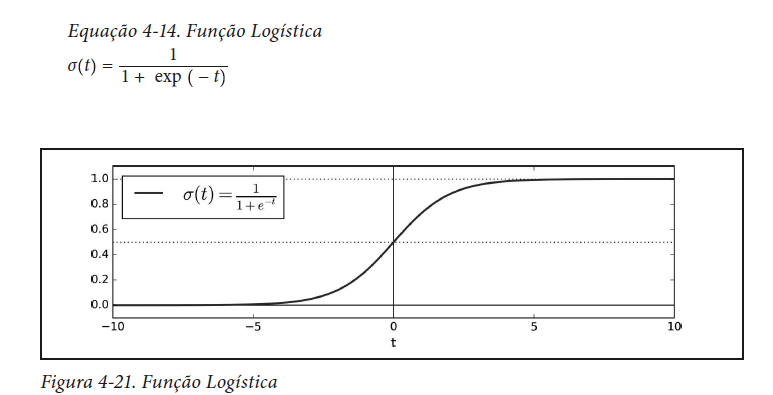

- No gráfico acima, F(t) < 0,5 quando t < 0 classificaria como "0" (negativo) e F(t) > 0,5 quando t > 1, classificaria como "1" (positivo)

#### Treinamento e Função de Custo

- O objetivo do treinamento é definir os parâmetros para que o modelo estime altas probabilidades para instâncias positivas e baixas probabildiades para instâncias negativas.
- A função de custo em relação a todo o conjunto de treinamento é o custo médio em relação a todas as instâncias de treinamento. Escrita através da função chamada _log loss_

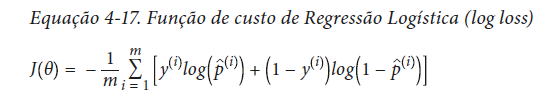

- Não há equação fechada para minimizar está função de custo.
- É uma função de custo convexa ("gráfico de banheira"), então gradiente descendente funciona muito bem e consegue encontrar o mínimo global.

#### Fronteiras de Decisão

- São fronteiras probabilisticas onde se tem valores de probabilidades para classificação da classes bem próximas ou idênticas.
- Região que se concentra as dúvidas/erro do algoritmo.

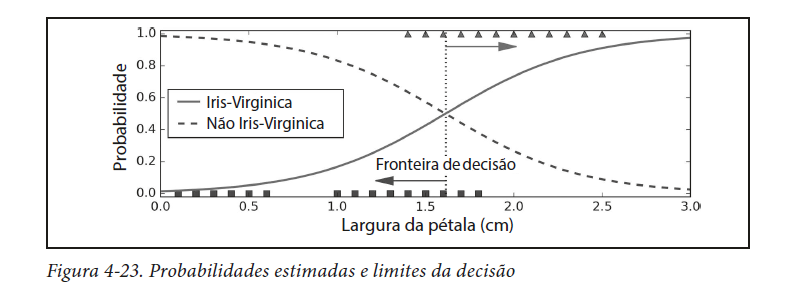

- No gráfico acima é analisada a probabilidade em cima apenas da caracteristica "Largura da pétala".
- No valor de largura 1,4cm o algortimo tem a alta probabilidade da classificação como Não Iris-Virginica e acima de 1,8cm tem a alta probabilidade da classificação Iris-Virginica. E por volta de 1,5cm há a fronteira de decisão, onde o algortimo não consegue ter a certeza da classificação, gerando sobreposição.

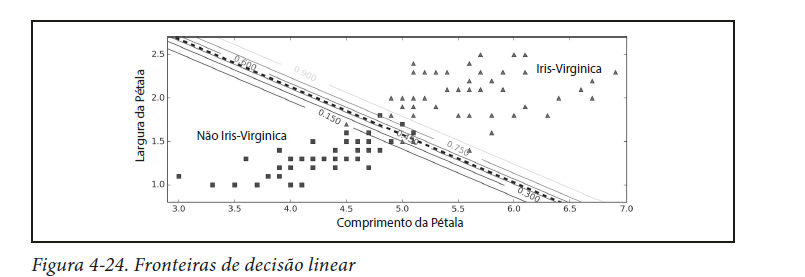

- Gráfico acima gerado através do treinamento de duas características, largura e comprimento da pétala.
- Linha tracejada representa a fronteira de decisão do algoritmo, probabilidade igual 50%. Possui linhas pararelas que o modelo produz com probabilidade especificas, 15% inferior esquerda e 90% superior direita.



- *Regressão Logística podem ser regularizados usando as penalidades de l1 e l2*

### Regressão Softmax

- Classificador Multinomial, classifica diversas classes sem precisar de agrupar diversos classificadores binários.
- Calcula a probabilidade para cada classe aplicando função softmax
- Prevê classe com maior probabilidade estimada
- Função custo que pode ser utilizada é _entropia cruzada_
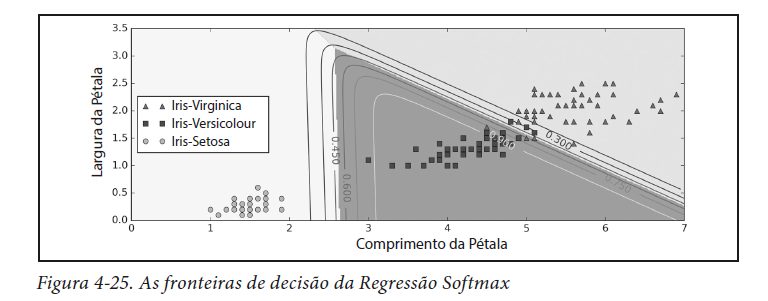

- Fronteira de decisão para multiclasses.

# Exercícios

**1 - Qual algoritmo de treinamento de Regressão Linear podemos utilizar se tivermos um conjunto de treinamentos com milhões de características?**

- Gradiente Descendente Lote
- Gradiente Descendente Minilotes
- Gradiente Descendente Estocásticos

Método do Mínimo Quadrado não é boa escolha por causa da quantidade de característica.

**2 - Suponha que as características do seu conjunto de treinamento tenham escalas muito diferentes. Que algortimo podemo sofrer com isso, e como? O que você pode fazer a respeito.**

Dados com escala diferente gera um gráfico de bacia alongada, fazendo com que o algortimo demore mais para converger. Então todos algortimos de Gradiente Descendente sofrem com isso. O método do quadrados perfeito funciona bem sem escalonamento.

**3 - O gradiente descendente pode ficar preso em um mínimo local ao treinar um modelo de Regressão Logística?**

A função de custo utilizada para classificação binária é a log loss e tem como característica um gráfico somente com mínimo global (gráfico banheira)

**4 - Se todos os algoritmos do Gradiente Descendente foram executados com tempo suficientes, eles o levarão ao mesmo modelo?**

Depende. Mesmo que todos os algoritmos encontre o mínimo global, não terá EXATO modelo e sim parecidos. E também depende da learning rate (taxa de aprendizado) utlizado no modelo, as vezes podem fazer o algoritmo cair no mínimo local ou até afastar dos mínimos.

**5 - Suponha que você utilize o Gradiente Descendente em Lote e plote seu erro de validação em cada época. Se você notar que o erro de validação sempre aumenta, o que provavelmente está acontecendo? Como consertar isso?**

Taxa de aprendizado muito alta, algortimo está divergindo.

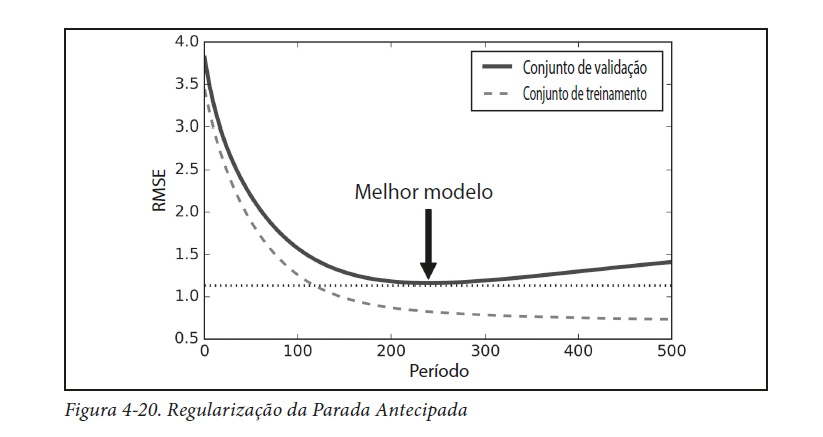

**6 - É uma boa ideia parar o Gradiente Descendente em Minilote imediatamente quando o erro de validação aumentar?**

Não. Gradiente Descendente em Minilote tem como característica essa variação no erro de validação, mas se utilizado de maneira correta (hiperparametros) no final consegue se aproximar do mínimo global.

**7 - Qual algoritmo Gradiente Descendente (entre aqueles discutidos) se aproximará mais rapidamente da solução ideal? Qual realmente convergirá? Como você pode fazer os outros convergirem também?**

A tendência é que Gradiente Descendente Estocástico seja o mais rápido, porque requer apenas uma instância por iteração, fazendo cada iteração em menor tempo. Apenas o Gradiente Descendente em Lote converge. O resultado final para todos acaba bem semelhante e fazem previsões da mesma maneira.

**8 - Suponha que esteja utilizando a Regressão Polinomial. Você plota as curvas de aprendizado e percebe que existe um grande hiato entre o erro de treinamento e o de validação. O que está acontecendo? Quais são as três maneiras de resolver isso?**

Algortimo sobreajustando sobre dados de treinamento. Resolve utilizando modelo mais simples, acrescentando mais dados de treinamento e regualrização dos dados.

**9 - Suponha que você esteja utilizando a Regressão Ridge e perceba que o erro de treinamento e o de validação são quase iguais e bastante altos. Você diria que o modelo sofre de um viés elevado ou de alta variância? Devemos aumentar o hiperparâmetro alfa "a" ou reduzi-lo?**

Viés elevado e baixa variância. Reduzir o valor de alfa "a". Underfitting dos dados.

**10 - Por que você utilizaria:**

**- Regressão de Ridge em vez de Regressão linear simples**

Regressão Ridge ajusta o modelo, fazendo o pesos do modelos mais reduzidos possíveis. Características que não interessa para a regressão ridge tendem a zero.

**- Lasso em vez de Regressão de Ridge**

Regressão de lasso elimina o peso das características que não ajudam o modelo. Regressão Ridge faz o peso tender a zero mas não elimina. Apenas se você tiver certeza que algumas característica realmente não influência no problema.  

**Elastic em vez de Regressão de Lasso**

É preferível utilizar Elastic Net quando número de características for maior que o número de instâncias de treinamento ou quando tiver alta correlação entre as características.

**11 - Suponha que você deseja classificar fotos como exterior/interior e dia/noite. Você deve implementar dois classificadores de Regressão Logística ou um de Regressão Softmax**

Dois classificadores de Regressão Logística. Porque são problemas binomial e não de multiclasse. Um algortimo para prever se é exterior/interior e outro algoritmo para prever dia/noite